<a href="https://colab.research.google.com/github/koseemre/data-science/blob/master/calisma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas.compat import StringIO
import numpy as np
import matplotlib.pyplot as plt


In [0]:
temp="""CUSTOMER_ID|NAME|LAST_NAME
1|Ahmet|YILMAZ
2|Mehmet|YILMAZ
3|Caner|YILMAZ"""


df = pd.read_csv(StringIO(temp), 
                 sep="|", 
                 skiprows=1, 
                 usecols=[0,1,2], 
                 names=['CUSTOMER_ID','NAME','LAST_NAME'])
print(df)

   CUSTOMER_ID    NAME LAST_NAME
0            1   Ahmet    YILMAZ
1            2  Mehmet    YILMAZ
2            3   Caner    YILMAZ


In [0]:
# WAY 2: upload file from local to colab
from google.colab import files
uploaded = files.upload()

Saving dc_customer.dat to dc_customer.dat
Saving dc_employee.dat to dc_employee.dat
Saving dc_product.dat to dc_product.dat
Saving dc_sale.dat to dc_sale.dat
Saving dc_store.dat to dc_store.dat


In [0]:
# veri toplama ve temizleme adımları


customer = pd.read_csv('dc_customer.dat', 
                 sep="|", 
                 skiprows=1, 
                 usecols=[0,1,2], 
                 names=['CUSTOMER_ID','NAME','LAST_NAME'])


employee = pd.read_csv('dc_employee.dat', 
                 sep="|", 
                 skiprows=1, 
                 usecols=[0,1,2,3], 
                 names=['EMPLOYEE_ID','NAME','LAST_NAME','STORE_ID'])

product = pd.read_csv('dc_product.dat', 
                 sep="|", 
                 skiprows=1, 
                 usecols=[0,1,2], 
                 names=['PRODUCT_ID','PRODUCT_NAME','PRICE'])
product['PRICE'] = pd.to_numeric(product["PRICE"].str.replace(',','.'))


sale = pd.read_csv('dc_sale.dat', 
                 sep="|", 
                 skiprows=1, 
                 usecols=[0,1,2,3,4,5,6,7,8], 
                 names=['SALE_ID','SALE_DATE','PRODUCT_ID','EMPLOYEE_ID','STORE_ID','CUSTOMER_ID','QUANTITY','PRICE','DISCOUNT'])

# çalışanın toplam satış miktarını bulabilmek için string değerleri sayısal değerlere dönüştürülür (data preprocessing)
sale["PRICE"] = pd.to_numeric(sale["PRICE"].str.replace(',','.'))
sale["DISCOUNT"] = pd.to_numeric(sale["DISCOUNT"].str.replace(',','.'))
sale["QUANTITY"] = pd.to_numeric(sale["QUANTITY"])
sale["SALE_DATE"] = pd.to_datetime(sale["SALE_DATE"])

store = pd.read_csv('dc_store.dat', 
                 sep="|", 
                 skiprows=1, 
                 usecols=[0,1,2], 
                 names=['STORE_ID','STORE_NAME','CITY'])

In [0]:
# store ve sale tabloları joinlenir
sales_store =pd.merge(store,sale ,on='STORE_ID' , how='inner')[['STORE_ID','STORE_NAME','CITY','SALE_DATE', 'PRICE' ,'QUANTITY' , 'DISCOUNT']]
sales_store["TOTAL"] = sales_store["PRICE"] * sales_store ["QUANTITY"] * (1-sales_store["DISCOUNT"])

In [0]:
# İstanbul un Anadolu ve Avrupa kıtaları satış bilgileri
IstAn_SALE = sales_store[sales_store['CITY'] == 'ISTANBUL Anadolu' ].groupby('CITY').agg({'TOTAL': np.sum })
IstAv_SALE = sales_store[sales_store['CITY'] == 'ISTANBUL Avrupa' ].groupby('CITY').agg({'TOTAL': np.sum })

In [87]:
# İstanbul'un toplam satışı
Ist_Total_Sale =  IstAn_SALE.iloc[0][0] + IstAv_SALE.iloc[0][0]
Ist_Total_Sale

71686477.87070021

In [0]:
# employee ve sale tabloları joinlenir
sales_employee =pd.merge(employee,sale ,on='EMPLOYEE_ID' , how='inner')[['EMPLOYEE_ID', 'NAME','LAST_NAME' , 'PRICE' ,'QUANTITY' , 'DISCOUNT']]

# her bir satıştan elde edilen miktar hesaplanır
sales_employee["TOTAL"] = sales_employee ["PRICE"] * sales_employee ["QUANTITY"] * (1-sales_employee ["DISCOUNT"])


In [0]:
# her çalışanın toplam satışı aggragate fonksiyonu ile hesaplanır
result = sales_employee.groupby('EMPLOYEE_ID').agg({'TOTAL': np.sum }).reset_index()


In [0]:
# Name ve Last name değerleri employe tablosu yardımıyla son olarak eşleştirilir
result['NAME'] = 'default value'
result['LAST_NAME'] = 'default value'

counter = 0
for r in result['EMPLOYEE_ID']:
  result['NAME'][counter]  = employee['NAME'][r-1] 
  result['LAST_NAME'][counter]  = employee['LAST_NAME'][r-1]
  counter = counter + 1 

In [0]:
result

,EMPLOYEE_ID,TOTAL,NAME,LAST_NAME
0,1,1.571543e+07,Erkan,YILMAZ
1,2,3.248829e+07,Emrah,YILMAZ
2,3,2.678105e+07,Onur,YILMAZ
3,4,2.062281e+07,Serhat,YILMAZ
4,5,2.030447e+07,Seda,YILMAZ
5,6,1.352871e+07,Osman,YILMAZ
6,7,5.869236e+06,Erkan,MURAT
7,8,5.956351e+06,Emrah,MURAT
8,9,2.901083e+06,Onur,MURAT


In [0]:
sales_store["TOTAL_DISCOUNT"] = sales_store ["PRICE"] * sales_store ["QUANTITY"]  - sales_store["TOTAL"]

In [95]:
sales_store

,STORE_ID,STORE_NAME,CITY,PRICE,QUANTITY,DISCOUNT,TOTAL,TOTAL_DISCOUNT
0,1,Store 1,ISTANBUL Anadolu,639.44,3,0.27,1400.3736,517.9464
1,1,Store 1,ISTANBUL Anadolu,639.44,3,0.01,1899.1368,19.1832
2,1,Store 1,ISTANBUL Anadolu,639.44,5,0.01,3165.2280,31.9720
3,1,Store 1,ISTANBUL Anadolu,639.44,4,0.11,2276.4064,281.3536
4,1,Store 1,ISTANBUL Anadolu,639.44,5,0.06,3005.3680,191.8320
5,1,Store 1,ISTANBUL Anadolu,639.44,3,0.30,1342.8240,575.4960
6,1,Store 1,ISTANBUL Anadolu,639.44,3,0.27,1400.3736,517.9464
7,1,Store 1,ISTANBUL Anadolu,639.44,2,0.06,1202.1472,76.7328
8,1,Store 1,ISTANBUL Anadolu,639.44,1,0.27,466.7912,172.6488
9,1,Store 1,ISTANBUL Anadolu,639.44,4,0.24,1943.8976,613.8624


In [109]:

Ordered_Discounts_Per_Store = sales_store.groupby(sales_store.STORE_ID).agg({'TOTAL_DISCOUNT': np.sum } ).reset_index().sort_values('TOTAL_DISCOUNT',ascending=False)

pd.merge(Ordered_Discounts_Per_Store, store, on=['STORE_ID'], how='inner')


,STORE_ID,TOTAL_DISCOUNT,STORE_NAME,CITY
0,3,8.515593e+06,Store 3,IZMIR
1,2,8.431307e+06,Store 2,ISTANBUL Avrupa
2,4,4.242783e+06,Store 4,ANKARA
3,1,4.189370e+06,Store 1,ISTANBUL Anadolu


In [0]:
#aylık satış bilgileri elde edilmesi (resetleme hayat kurtardı)
sales_store_per_month = sales_store.groupby(['STORE_ID',pd.Grouper(key='SALE_DATE', freq='M')]).agg({'TOTAL': np.sum , 'QUANTITY': np.sum }).reset_index()
sales_store_per_month_detailed = pd.merge( store,sales_store_per_month, on=['STORE_ID'], how='inner')

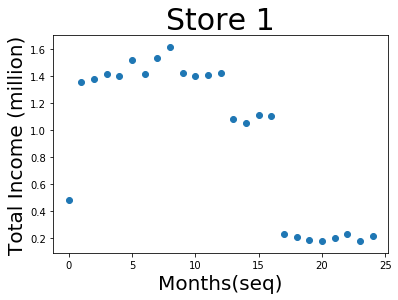

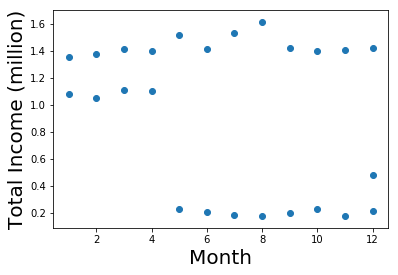

In [188]:
store1_monthly = sales_store_per_month_detailed[sales_store_per_month_detailed.STORE_ID == 1]
plt.scatter(np.arange(store1_monthly['TOTAL'].size),store1_monthly['TOTAL'] / 10**6)
plt.title('Store 1',fontsize=30)
plt.xlabel('Months(seq)',fontsize=20)
plt.ylabel('Total Income (million)',fontsize=20)
plt.show()

plt.scatter(pd.DatetimeIndex(store1_monthly['SALE_DATE']).month,store1_monthly['TOTAL'] / 10**6)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Total Income (million)',fontsize=20)
plt.show()




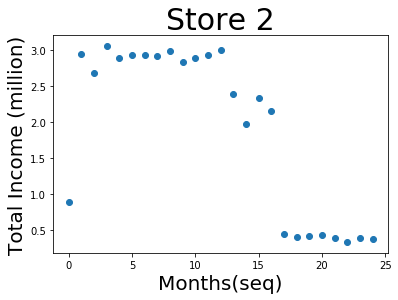

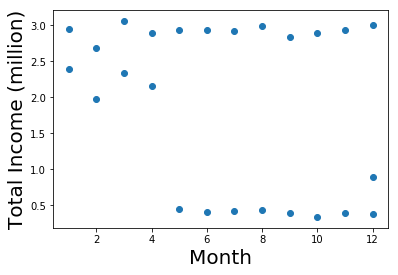

In [184]:
store2_monthly = sales_store_per_month_detailed[sales_store_per_month_detailed.STORE_ID == 2]
plt.scatter(np.arange(store2_monthly['TOTAL'].size),store2_monthly['TOTAL'] / 10**6)
plt.title('Store 2',fontsize=30)
plt.xlabel('Months(seq)',fontsize=20)
plt.ylabel('Total Income (million)',fontsize=20)
plt.show()

plt.scatter(pd.DatetimeIndex(store2_monthly['SALE_DATE']).month,store2_monthly['TOTAL'] / 10**6) # nearly to mean
plt.xlabel('Month',fontsize=20)
plt.ylabel('Total Income (million)',fontsize=20)
plt.show()

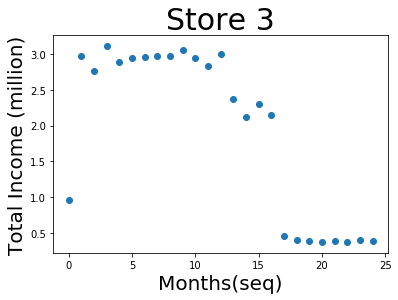

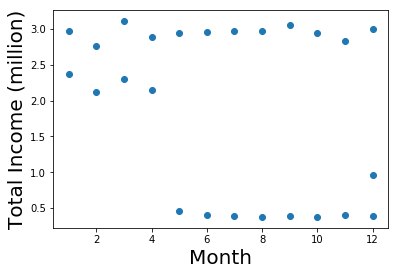

In [185]:
store3_monthly = sales_store_per_month_detailed[sales_store_per_month_detailed.STORE_ID == 3]
plt.scatter(np.arange(store3_monthly['TOTAL'].size),store3_monthly['TOTAL'] / 10**6)
plt.title('Store 3',fontsize=30)
plt.xlabel('Months(seq)',fontsize=20)
plt.ylabel('Total Income (million)',fontsize=20)
plt.show()

plt.scatter(pd.DatetimeIndex(store3_monthly['SALE_DATE']).month,store3_monthly['TOTAL'] / 10**6)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Total Income (million)',fontsize=20)
plt.show()

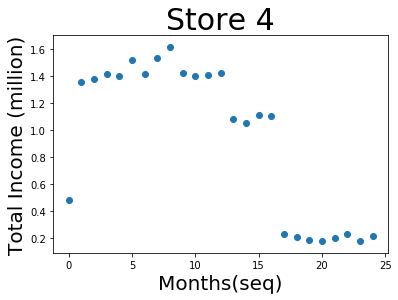

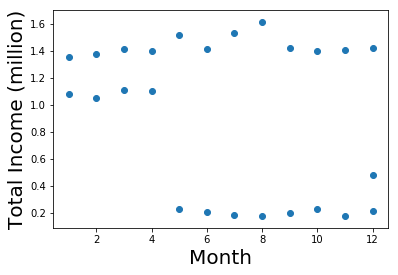

In [186]:
store4_monthly = sales_store_per_month_detailed[sales_store_per_month_detailed.STORE_ID == 1]
plt.scatter(np.arange(store4_monthly['TOTAL'].size),store4_monthly['TOTAL'] / 10**6)
plt.title('Store 4',fontsize=30)
plt.xlabel('Months(seq)',fontsize=20)
plt.ylabel('Total Income (million)',fontsize=20)
plt.show()

plt.scatter(pd.DatetimeIndex(store4_monthly['SALE_DATE']).month,store4_monthly['TOTAL'] / 10**6)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Total Income (million)',fontsize=20)
plt.show()

In [221]:
# anlamlı verilere çevirme inputlar y = o mağazanın toplam geliri, x1 = hangi ay, x2 = o ay içindeki satışlardaki product sayısı )
sales_store_per_month["Month"] = pd.DatetimeIndex(sales_store_per_month['SALE_DATE']).month
S1 = sales_store_per_month[sales_store_per_month.STORE_ID == 1]
S2 = sales_store_per_month[sales_store_per_month.STORE_ID == 2]
S3 = sales_store_per_month[sales_store_per_month.STORE_ID == 3]
S4 = sales_store_per_month[sales_store_per_month.STORE_ID == 4]

sales_store_per_month


,STORE_ID,SALE_DATE,TOTAL,QUANTITY,Month
0,1,2017-12-31,4.791903e+05,983,12
1,1,2018-01-31,1.356770e+06,2862,1
2,1,2018-02-28,1.374018e+06,2775,2
3,1,2018-03-31,1.413362e+06,2901,3
4,1,2018-04-30,1.399998e+06,2948,4
5,1,2018-05-31,1.514415e+06,3277,5
6,1,2018-06-30,1.410720e+06,2898,6
7,1,2018-07-31,1.534271e+06,3102,7
8,1,2018-08-31,1.612423e+06,3273,8
9,1,2018-09-30,1.424472e+06,3000,9


In [0]:
from sklearn.linear_model import LinearRegression

y = S1['TOTAL']
x = S1[['QUANTITY' ,'Month']]
x.describe()
model = LinearRegression().fit(x, y)

In [231]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.9982981751963799
intercept: -9893.618620264344
slope: [ 481.65063709 1843.81775379]
predicted response:
[ 485694.77068571 1370434.32248807 1330374.53481494 1392906.3328422
 1417387.73053927 1577694.60789601 1396992.8341923  1497093.38191266
 1581299.45860902 1451652.65243695 1420262.57623146 1405248.62168707
 1399867.67988449 1107453.07463636 1019228.22325413 1116438.86715195
 1118764.33554283  232926.02913784  204907.50739199  183150.44392832
  183549.30977083  189246.33262135  224324.04433442  181856.00347584
  222713.522834  ]


In [247]:
from sklearn.preprocessing import StandardScaler
z = S1[['QUANTITY' ,'Month' ,'TOTAL']]
scaler = StandardScaler()
scaler.fit(z)
scaled = scaler.transform(z)


array([[-0.84914733,  1.48737705, -0.84590687],
       [ 0.77730306, -1.61132514,  0.7360243 ],
       [ 0.70199641, -1.32962494,  0.76711707],
       [ 0.81106121, -1.04792474,  0.83803851],
       [ 0.85174411, -0.76622454,  0.81394864],
       [ 1.1365244 , -0.48452434,  1.02019636],
       [ 0.80846443, -0.20282414,  0.83327661],
       [ 0.98504552,  0.07887606,  1.05598899],
       [ 1.13306203,  0.36057626,  1.19686646],
       [ 0.89675498,  0.64227646,  0.85806509],
       [ 0.83702902,  0.92397666,  0.80963155],
       [ 0.80673324,  1.20567685,  0.82555325],
       [ 0.79374934,  1.48737705,  0.84968714],
       [ 0.30468895, -1.61132514,  0.24211259],
       [ 0.14282295, -1.32962494,  0.1791469 ],
       [ 0.31421048, -1.04792474,  0.29488698],
       [ 0.31507607, -0.76622454,  0.27588791],
       [-1.28021294, -0.48452434, -1.29720414],
       [-1.33387975, -0.20282414, -1.33836569],
       [-1.37629383,  0.07887606, -1.37901828],
       [-1.37889061,  0.36057626, -1.386

In [0]:
inputt = pd.DataFrame({'x1':scaled[:,1],'x2':scaled[:,2]})
output = pd.DataFrame({'y':scaled[:,0]})


In [258]:
model = LinearRegression().fit(inputt, output)
r_sq = model.score(inputt, output)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')


coefficient of determination: 0.9983117010608766
intercept: [-6.12939312e-17]
slope: [[-0.01237817  0.99507043]]
predicted response:
[[ -0.22689663]
 [-34.43125424]
 [-32.35928295]
 [-32.92386203]
 [-32.51056562]
 [-35.58791336]
 [-29.90151621]
 [-31.43159261]
 [-32.55318937]
 [-28.17887833]
 [-26.32971411]
 [-24.9014077 ]
 [-23.7206647 ]
 [-27.67277301]
 [-24.36298465]
 [-25.81879202]
 [-24.83609976]
 [ -1.02806064]
 [  0.73445638]
 [  2.33605718]
 [  3.36826213]
 [  4.26430719]
 [  4.40528385]
 [  6.53914599]
 [  6.53158459]]
